Initial explanation about the project.

Since our dataset is already preprocessed we can just simply import the desired tools and load the data.

In [29]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn as skl
import matplotlib.pyplot as plt

dataframe = pd.read_csv('data.csv')
#dataframe.head()

Now we set our X and Y axis.

In [30]:
x_axis = dataframe.drop('Target', axis=1)
y_axis = dataframe['Target']

Describe what we doing bellow.

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x_axis, y_axis, test_size=0.25, random_state=40)

The next step is to train our model.

In [32]:
start_train = time.time()
clf = DecisionTreeClassifier(random_state=40)
clf.fit(x_train, y_train)
end_train = time.time()

Describe what we doing bellow.

In [33]:
start_test = time.time()
y_pred = clf.predict(x_test)
end_test = time.time()

Describe what we doing bellow.

In [34]:
accuracy = skl.metrics.accuracy_score(y_test, y_pred)
precision = skl.metrics.precision_score(y_test, y_pred, average="weighted", zero_division=0)
recal = skl.metrics.recall_score(y_test, y_pred, average="weighted", zero_division=0)
f1_score = skl.metrics.f1_score(y_test, y_pred, average="weighted", zero_division=0)
confusion_matrix = skl.metrics.confusion_matrix(y_test,y_pred)


print(f"Acuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recal:.4f}")
print(f"F1-Score: {f1_score:.4f}")
print("Confusion Matrix:\n")
print(confusion_matrix)
print("Classification Report:\n")
print(skl.metrics.classification_report(y_test,y_pred, zero_division=0))

print(f"Training time: {end_train-start_train:.4f} seconds")
print(f"Testing time: {end_test-start_test:.4f} seconds")



Acuracy: 0.6709
Precision: 0.6686
Recall: 0.6709
F1-Score: 0.6693
Confusion Matrix:

[[245  68  52]
 [ 46  85  86]
 [ 53  59 412]]
Classification Report:

              precision    recall  f1-score   support

     Dropout       0.71      0.67      0.69       365
    Enrolled       0.40      0.39      0.40       217
    Graduate       0.75      0.79      0.77       524

    accuracy                           0.67      1106
   macro avg       0.62      0.62      0.62      1106
weighted avg       0.67      0.67      0.67      1106

Training time: 0.0552 seconds
Testing time: 0.0044 seconds


Here's the visual representation of the Decision Tree.

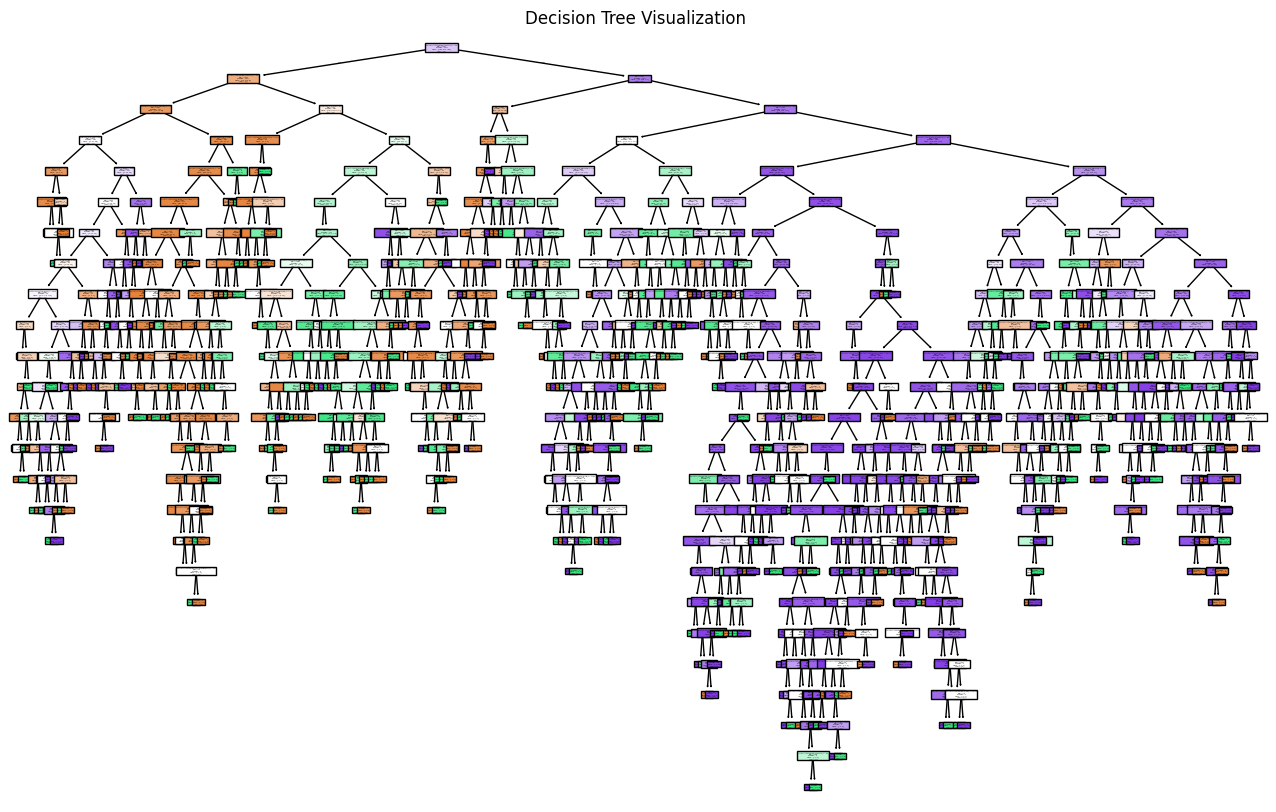

In [38]:
plt.figure(figsize=(16,10))
skl.tree.plot_tree(clf, filled=True, feature_names=x_axis.columns, class_names=True)
plt.title("Decision Tree Visualization")
plt.show()